In [4]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
print(cv2.__version__)

def display_img(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Load an image from file
img_path = "D:\_IITM_ZNZ\Short_Course_CV_IVP_2024\standard_test_images/"

4.9.0


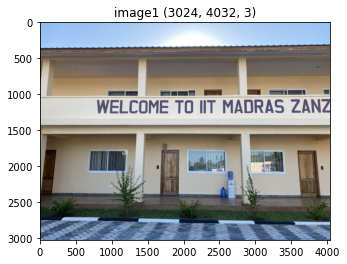

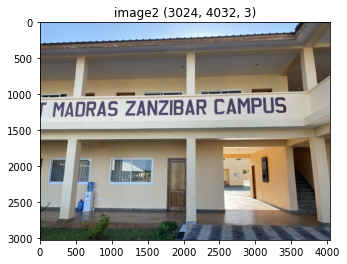

In [5]:
# Example usage
image1 = cv2.imread(img_path + 'iit1.jpg')
image2 = cv2.imread(img_path + 'iit2.jpg')

display_img(image1, 'image1 ' + str(image1.shape))
display_img(image2, 'image2 ' + str(image2.shape))


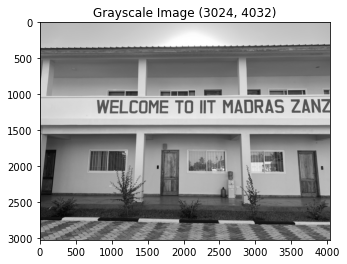

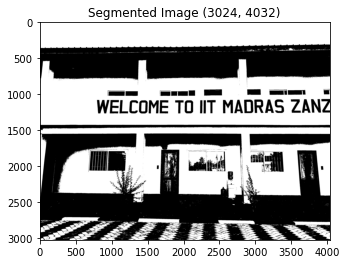

In [6]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, segmented_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

display_img(gray_image, 'Grayscale Image ' + str(gray_image.shape))
display_img(segmented_image, 'Segmented Image ' + str(segmented_image.shape))

Optimal threshold: 139


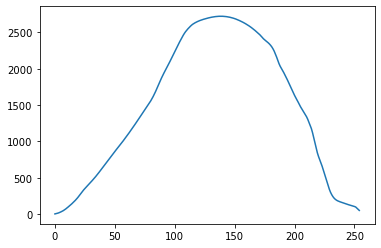

In [7]:
def otsu_threshold(image):
    # Compute histogram
    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0,256))
    total_pixels = image.shape[0] * image.shape[1]

    # Initialize variables
    best_threshold = 0
    best_variance = 0
    
    all_variance = []

    # Iterate through all possible threshold values
    for t in range(1, 256):
        # Compute class probabilities
        w0 = np.sum(histogram[:t]) / total_pixels
        w1 = np.sum(histogram[t:]) / total_pixels

        # Compute class means
        u0 = np.sum(np.arange(t) * histogram[:t]) / (np.sum(histogram[:t]) + 1e-5)
        u1 = np.sum(np.arange(t, 256) * histogram[t:]) / (np.sum(histogram[t:]) + 1e-5)

        # Compute between-class variance
        between_variance = w0 * w1 * (u0 - u1) ** 2
        
        all_variance.append(between_variance)

        # Update best threshold if variance is higher
        if between_variance > best_variance:
            best_threshold = t
            best_variance = between_variance

    return best_threshold, all_variance

threshold, all_variance = otsu_threshold(gray_image)
print("Optimal threshold:", threshold)
plt.plot(all_variance)

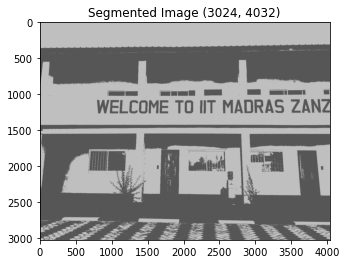

In [8]:
# Reshape the image into a 2D array of pixels
pixels = gray_image.reshape((-1, 3))
pixels = np.float32(pixels)

# Define the criteria (epsilon and maximum number of iterations)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 1.0)

# Set the number of clusters (k)
k = 2

# Perform k-means clustering
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to 8-bit unsigned integers
centers = np.uint8(centers)

# Map each pixel to its corresponding center
segmented_image = centers[labels.flatten()]

# Reshape the segmented image back to its original shape
segmented_image = segmented_image.reshape(gray_image.shape)

display_img(segmented_image, 'Segmented Image ' + str(segmented_image.shape))

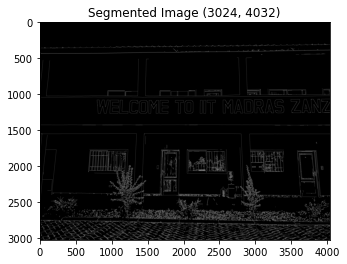

In [30]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 255)  # Adjust threshold values as needed

display_img(edges, 'Segmented Image ' + str(edges.shape))

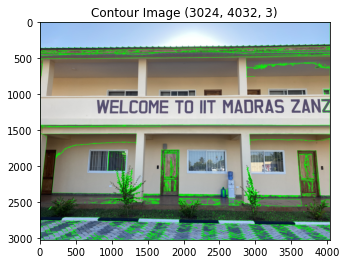

In [31]:
# Apply binary thresholding
_, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = cv2.drawContours(image1.copy(), contours, -1, (0, 255, 0), 2)

display_img(contour_image, 'Contour Image ' + str(contour_image.shape))